# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [95]:
# Your code here
import pandas as pd

diamonds = pd.read_csv('diamonds.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [96]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [97]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


And inspect the value counts for the categorical features:

In [98]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [99]:
# Your code here - look at correlations
numericals = diamonds.select_dtypes("number")
numericals.corr()
numericals

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.23,56.9,65.0,327,4.05,4.07,2.31
4,0.29,62.4,58.0,334,4.20,4.23,2.63
5,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74


Identify the name of the predictor column with the strongest correlation below.

In [100]:
# Replace None with appropriate code
most_correlated = "carat"

The following code checks that you specified a column correctly:

In [101]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

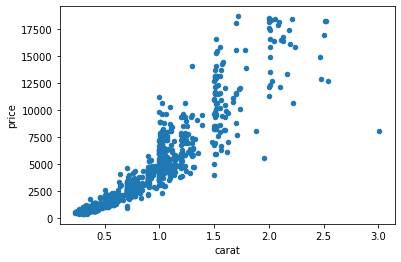

In [102]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [103]:
# Replace None with appropriate code
y = diamonds['price']
X_baseline = diamonds.iloc[:,:1] # get first column by returning dataframe
X_baseline

,carat
1,0.23
2,0.21
3,0.23
4,0.29
5,0.31
...,...
53936,0.72
53937,0.72
53938,0.70
53939,0.86


The following code checks that you created valid `y` and `X_baseline` variables:

In [104]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53940,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [105]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [106]:
# Your code here
baseline_results.params

baseline_results.predict([3, 4]) # predicting for some random possible X values

baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:54:25   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then summarize your findings below:

In [107]:
# Your written answer here

"""
Since 'carat' was the attribute most strongly correlated with price, we regressed price over carats.

The regression summary shows a R-squared value of 0.849, suggesting that the 'carat' explains 84.9% of the variation in price.

Both the constant and 'carat' are statistically significant, with p-values less than 0.05. We can comfortably reject the null 
hypothesis that the coefficients of either the constant or 'carat' is zero.

The coefficients suggests that for every one unit increase in the 'carat' of a diamond, the price will increase by $7,756. 

I find it interesting that the coefficient on the constant (i.e. the y-intercept) is -$2,256. This suggests that a 0.291 carat 
diamond would be free since negative coefficient on the constant would offset the price increase when the diamond is 0.291 carats.
"""

"\nSince 'carat' was the attribute most strongly correlated with price, we regressed price over carats.\n\nThe regression summary shows a R-squared value of 0.849, suggesting that the 'carat' explains 84.9% of the variation in price.\n\nBoth the constant and 'carat' are statistically significant, with p-values less than 0.05. We can comfortably reject the null \nhypothesis that the coefficients of either the constant or 'carat' is zero.\n\nThe coefficients suggests that for every one unit increase in the 'carat' of a diamond, the price will increase by $7,756. \n\nI find it interesting that the coefficient on the constant (i.e. the y-intercept) is -$2,256. This suggests that a 0.291 carat \ndiamond would be free since negative coefficient on the constant would offset the price increase when the diamond is 0.291 carats.\n"

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

In [108]:
# # Run this code without changes
# import matplotlib.pyplot as plt

# categorical_features = diamonds.select_dtypes("object").columns
# fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

# for index, feature in enumerate(categorical_features):
#     diamonds.groupby(feature).mean().plot.bar(
#         y="price", ax=axes[index])

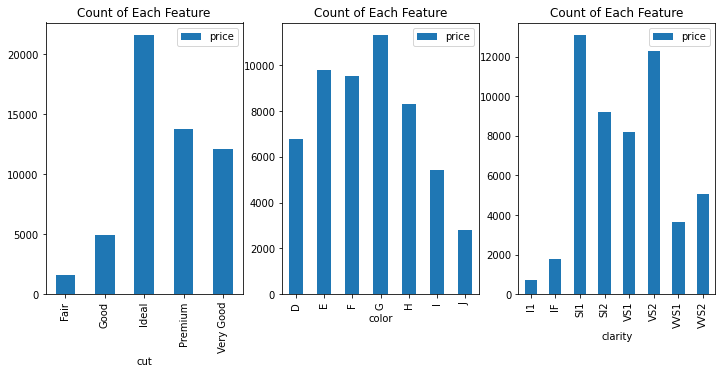

In [109]:
# Updated mean() to count() so I could plot. I was getting an error with mean() above

import matplotlib.pyplot as plt

categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for axis in axes:
    axis.set_title('Count of Each Feature')

for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature).count().plot.bar(
        y="price", ax=axes[index])

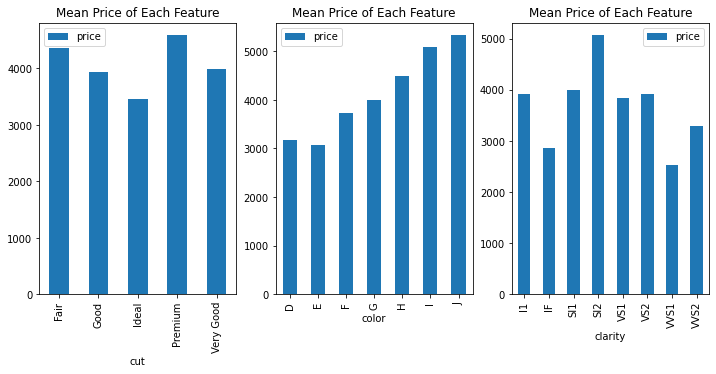

In [110]:
# Updated mean() to mean('price') so I could plot. I was getting an error with mean() above

import matplotlib.pyplot as plt

categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for axis in axes:
    axis.set_title('Mean Price of Each Feature')

for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature).mean('price').plot.bar(
        y="price", ax=axes[index])

Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [111]:
# Replace None with appropriate code
cat_col = 'color'

The following code checks that you specified a column correctly:

In [112]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [113]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated

,carat,color
1,0.23,E
2,0.21,E
3,0.23,E
4,0.29,I
5,0.31,J
...,...,...
53936,0.72,D
53937,0.72,D
53938,0.70,D
53939,0.86,H


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [114]:
# Replace None with appropriate code

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated

X_iterated = pd.get_dummies(diamonds[[most_correlated, cat_col]])
X_iterated = sm.add_constant(X_iterated)
X_iterated

,const,carat,color_D,color_E,color_F,color_G,color_H,color_I,color_J
1,1.0,0.23,False,True,False,False,False,False,False
2,1.0,0.21,False,True,False,False,False,False,False
3,1.0,0.23,False,True,False,False,False,False,False
4,1.0,0.29,False,False,False,False,False,True,False
5,1.0,0.31,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
53936,1.0,0.72,True,False,False,False,False,False,False
53937,1.0,0.72,True,False,False,False,False,False,False
53938,1.0,0.70,True,False,False,False,False,False,False
53939,1.0,0.86,False,False,False,False,True,False,False


The following code checks that you have the right number of columns:

In [115]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference".

In [116]:
# Your code here

X_iterated = pd.get_dummies(diamonds[[most_correlated, cat_col]], drop_first=True)
X_iterated = sm.add_constant(X_iterated)
X_iterated

,const,carat,color_E,color_F,color_G,color_H,color_I,color_J
1,1.0,0.23,True,False,False,False,False,False
2,1.0,0.21,True,False,False,False,False,False
3,1.0,0.23,True,False,False,False,False,False
4,1.0,0.29,False,False,False,False,True,False
5,1.0,0.31,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
53936,1.0,0.72,False,False,False,False,False,False
53937,1.0,0.72,False,False,False,False,False,False
53938,1.0,0.70,False,False,False,False,False,False
53939,1.0,0.86,False,False,False,True,False,False


Now you should have 1 fewer column than before:

In [117]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [118]:
import numpy as np

X = X_iterated.astype(float)
X

,const,carat,color_E,color_F,color_G,color_H,color_I,color_J
1,1.0,0.23,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.21,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.23,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.29,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.31,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
53936,1.0,0.72,0.0,0.0,0.0,0.0,0.0,0.0
53937,1.0,0.72,0.0,0.0,0.0,0.0,0.0,0.0
53938,1.0,0.70,0.0,0.0,0.0,0.0,0.0,0.0
53939,1.0,0.86,0.0,0.0,0.0,1.0,0.0,0.0


In [119]:
iterated_model = sm.OLS(y, X)
iterated_results = iterated_model.fit()
iterated_results.params
iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:54:27   Log-Likelihood:            -4.6998e+05
No. Observations:               53940   AIC:                         9.400e+05
Df Residuals:                   53932   BIC:                         9.400e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2136.2289     20.122   -106.162      0.000   -2175.669   -2096.789
carat       8066.6230     14.040    574.558      0.000    8039.105    8094.141
color_E      -93.7813     23.252     -4.033      0.000    -139.355     -48.208
color_F      -80.2629     23.405     -3.429      0.001    -126.136     -34.390
color_G      -85.5363     22.670     -3.773      0.000    -129.969     -41.103
color_H     -732.2418     24.354    -30.067      0.000    -779.975    -684.508
color_I    -1055.7319     27.310    -38.657      0.000   -1109.260   -1002.203
color_J    -1914.4722     33.777    -56.679      0.000   -1980.676   -1848.268
==============================================================================
Omnibus:                    12266.990   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165317.069
Skew:                           0.719   Prob(JB):                         0.00
Kurtosis:                      11.455   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
X

,const,carat,color_E,color_F,color_G,color_H,color_I,color_J
1,1.0,0.23,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.21,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.23,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.29,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.31,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
53936,1.0,0.72,0.0,0.0,0.0,0.0,0.0,0.0
53937,1.0,0.72,0.0,0.0,0.0,0.0,0.0,0.0
53938,1.0,0.70,0.0,0.0,0.0,0.0,0.0,0.0
53939,1.0,0.86,0.0,0.0,0.0,1.0,0.0,0.0


In [121]:
# Next, we standardize BOTH the dependent(response) and the independent(predictor) variables before running the linear regression model 
# so resulting coefficients are easier to interpret. For the independent(predictor) variables, we only standardize the numerical 
# variables i.e. carat, the most correlated numerical variable.
X[most_correlated] = (X[most_correlated] - np.mean(X[most_correlated])) / np.std(X[most_correlated])
X

,const,carat,color_E,color_F,color_G,color_H,color_I,color_J
1,1.0,-1.198168,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-1.240361,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-1.198168,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-1.071587,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,-1.029394,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
53936,1.0,-0.164427,0.0,0.0,0.0,0.0,0.0,0.0
53937,1.0,-0.164427,0.0,0.0,0.0,0.0,0.0,0.0
53938,1.0,-0.206621,0.0,0.0,0.0,0.0,0.0,0.0
53939,1.0,0.130927,0.0,0.0,0.0,1.0,0.0,0.0


In [122]:
y_scaled = (y - np.mean(y)) / np.std(y)
y_scaled

1       -0.904095
2       -0.904095
3       -0.903844
4       -0.902090
5       -0.901839
           ...   
53936   -0.294731
53937   -0.294731
53938   -0.294731
53939   -0.294731
53940   -0.294731
Name: price, Length: 53940, dtype: float64

In [123]:
# Your code here

iterated_model = sm.OLS(y_scaled, X)
iterated_results = iterated_model.fit()
iterated_results.params
iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:54:27   Log-Likelihood:                -22737.
No. Observations:               53940   AIC:                         4.549e+04
Df Residuals:                   53932   BIC:                         4.556e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0922      0.005     20.441      0.000       0.083       0.101
carat          0.9584      0.002    574.558      0.000       0.955       0.962
color_E       -0.0235      0.006     -4.033      0.000      -0.035      -0.012
color_F       -0.0201      0.006     -3.429      0.001      -0.032      -0.009
color_G       -0.0214      0.006     -3.773      0.000      -0.033      -0.010
color_H       -0.1835      0.006    -30.067      0.000      -0.196      -0.172
color_I       -0.2646      0.007    -38.657      0.000      -0.278      -0.251
color_J       -0.4799      0.008    -56.679      0.000      -0.496      -0.463
==============================================================================
Omnibus:                    12266.990   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165317.069
Skew:                           0.719   Prob(JB):                         0.00
Kurtosis:                      11.455   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [124]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:54:27   Log-Likelihood:                -22737.
No. Observations:               53940   AIC:                         4.549e+04
Df Residuals:                   53932   BIC:                         4.556e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0922      0.005     20.441      0.0

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

In [125]:
# Your written answer here
"""
Since 'carat' was the attribute most strongly correlated with price, we selected 'carat' as our numerical independent variable.
I selected 'color' as the categorical variable because changes in the the categories seems to have a more uniformed effect on
'price' compared to the effect 'clarity' or 'cut' had on price. I then created dummy variables for the 'color', and standardized
the numerical variables, 'carat' and 'price'. Finally, I regressed price over carats and color.

Since our dependent (response) and the independent (predictor) variables are now standard scaled, we interpret the standardized 
coefficient measured in units of standard deviation. Therefore, the beta value of 0.9584 for 'carat' indicates that a one standard 
deviation increase in the 'carats' (the independent variable) results in a 0.9584 standard deviations increase in the 'price', the 
dependent variable.

Since we now have dummy variables for our categorical variables, the coefficients on the dummy variables indicate the difference we 
can expect in our target variable (price) when we increase the predictor variable (color) by one unit. But for the 'color' variable, 
"increasing it by one unit" means going from the base color D to E, or E to F, etc.  We interprete the coefficients of the categorical 
variables in this linear regression model against a baseline, which is where the values of the inputs are 0. For the same reason, 
this also affects the interpretation of the intercept term. For color, we can therefore say the following:

  *  changing the color from D to E results in a 0.0235 standard deviations decrease in the 'price
  *  changing the color from E to F results in a 0.0201 standard deviations decrease in the 'price
  *  changing the color from F to G results in a 0.0214 standard deviations decrease in the 'price
  *  changing the color from G to H results in a 0.1835 standard deviations decrease in the 'price
  *  changing the color from H to I results in a 0.2646 standard deviations decrease in the 'price
  *  changing the color from I to J results in a 0.4799 standard deviations decrease in the 'price

These coefficients on the color dummy variable makes sense since color D is considered the best quality, and that is the baseline
category that we dropped. Therefore, going from D to E, and eventually to J would result in decreases in price.

The regression summary shows a R-squared value of 0.864, suggesting that the 'carat' and 'color' together explain 86.4% of the variation 
in price. This is better than the 0.849 R-squared value we got for the simple linear regression of price on only carat.

In both models, the multiple and simple linear regresions, the coefficients of the constant and predictor variables are statistically 
significant, with p-values less than 0.05. Therefore, in both models, we can comfortably reject the null hypothesis that the coefficients 
of either the constant or predictor variables are zero.

While we were able to interpret the simple linear regression of price on carats at the unit level, we have to interpret the multiple
linear regression using standard deviations since we standard scaled the numerical variables (price and carats). 

Interestingly, while the coefficient on the constant (i.e. the y-intercept) was negative on the simple linear regression of price on
carats, suggesting that a 0.291 carat diamond would be free, the y-intercept for the multiple linear regression is positive, and make
a lot more sense.
"""

'\nSince \'carat\' was the attribute most strongly correlated with price, we selected \'carat\' as our numerical independent variable.\nI selected \'color\' as the categorical variable because changes in the the categories seems to have a more uniformed effect on\n\'price\' compared to the effect \'clarity\' or \'cut\' had on price. I then created dummy variables for the \'color\', and standardized\nthe numerical variables, \'carat\' and \'price\'. Finally, I regressed price over carats and color.\n\nSince our dependent (response) and the independent (predictor) variables are now standard scaled, we interpret the standardized \ncoefficient measured in units of standard deviation. Therefore, the beta value of 0.9584 for \'carat\' indicates that a one standard \ndeviation increase in the \'carats\' (the independent variable) results in a 0.9584 standard deviations increase in the \'price\', the \ndependent variable.\n\nSince we now have dummy variables for our categorical variables, the 

## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.